In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\Ahmed\Downloads\Compressed\diabetes.csv')

# Explore Data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.duplicated().sum()

0

# Analysis

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

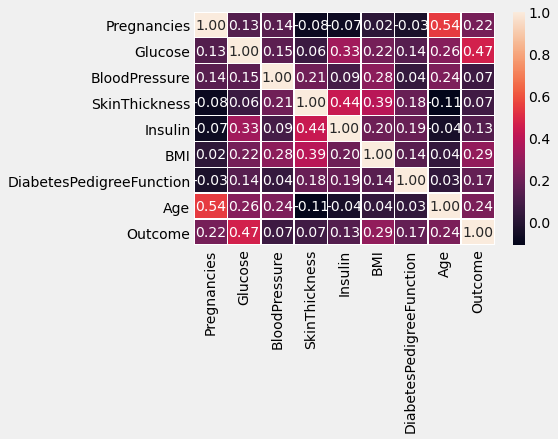

In [8]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidth=.5)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

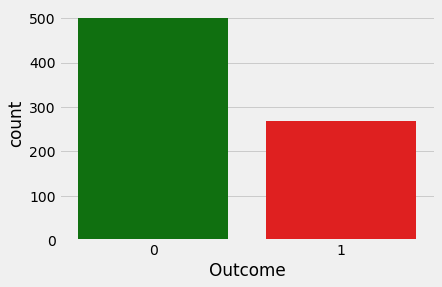

In [9]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

In [10]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape , mini.shape
268/(500+268)

0.3489583333333333

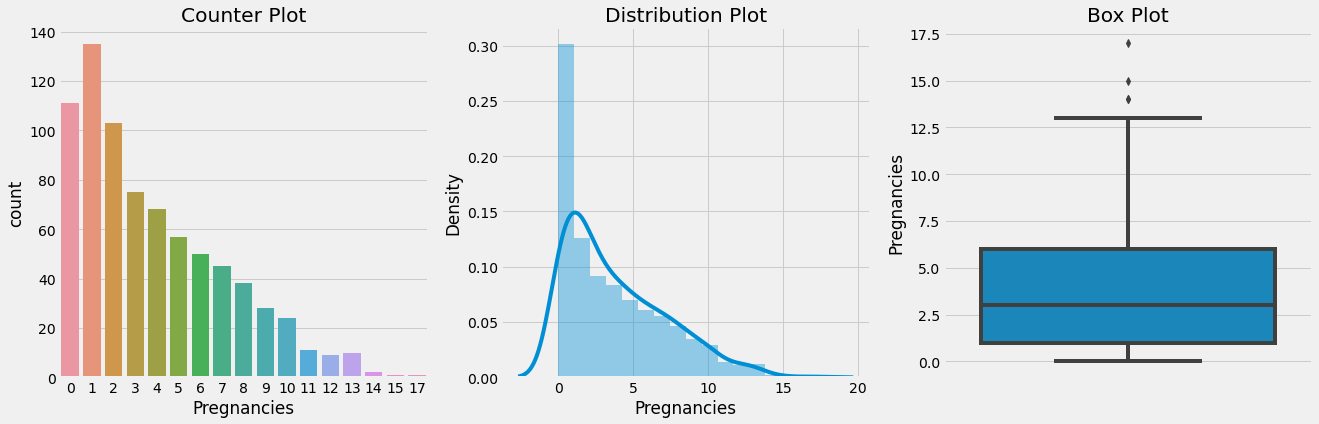

In [11]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Pregnancies',data = data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])

plt.show()

<AxesSubplot:xlabel='Age'>

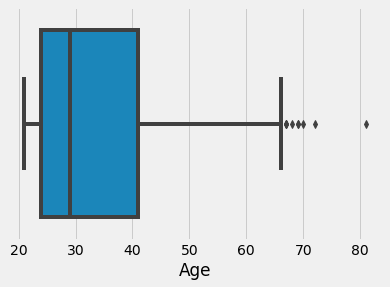

In [12]:
sns.boxplot(data.Age)

# Create Model

In [13]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [14]:
#!pip install imblearn
#!pip install imbalanced-learn
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import NearMiss
rm=RandomOverSampler(random_state=21)
x_res,y_res=rm.fit_resample(x,y)
x.shape , y.shape

((768, 8), (768,))

In [15]:
from collections import Counter
print('old data set shape {}'.format(Counter(y)))
print('new data set shape {}'.format(Counter(y_res)))

old data set shape Counter({0: 500, 1: 268})
new data set shape Counter({1: 500, 0: 500})


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.2,random_state=41)

In [17]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(n_estimators=100,class_weight='balanced')
model4=GradientBoostingClassifier(n_estimators=1000)
model5=GaussianNB()

In [18]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier','GaussianNB']
result1=[]
result2=[]
result3=[]

LogisticRegression()
accuracy is :  0.765 recall is : 0.797979797979798 f1 is : 0.7707317073170732


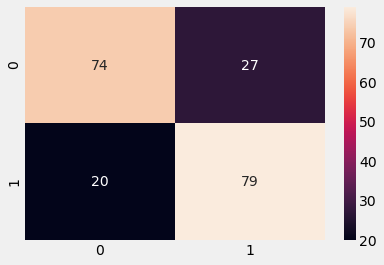

In [19]:
def cal(model):    
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is : ',accuracy,'recall is :',recall,'f1 is :', f1)
cal(model1)  

SVC()
accuracy is :  0.71 recall is : 0.75 f1 is : 0.712871287128713


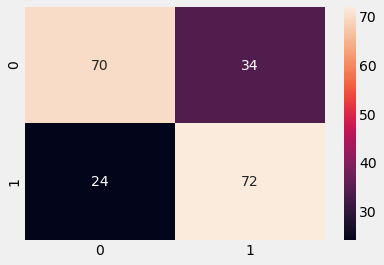

In [20]:
cal(model2)

RandomForestClassifier(class_weight='balanced')
accuracy is :  0.875 recall is : 0.8648648648648649 f1 is : 0.8847926267281107


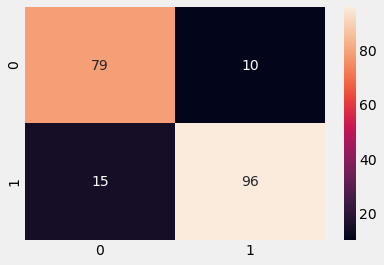

In [21]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.855 recall is : 0.8290598290598291 f1 is : 0.8699551569506727


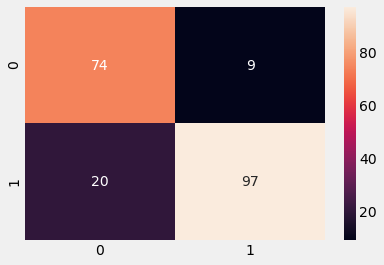

In [22]:
cal(model4)

GaussianNB()
accuracy is :  0.76 recall is : 0.79 f1 is : 0.7669902912621359


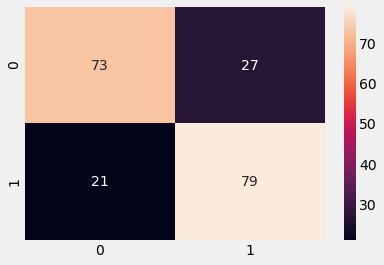

In [23]:
cal(model5)

In [24]:
result2

[0.797979797979798, 0.75, 0.8648648648648649, 0.8290598290598291, 0.79]

In [25]:
result3

[0.7707317073170732,
 0.712871287128713,
 0.8847926267281107,
 0.8699551569506727,
 0.7669902912621359]

In [26]:
FinalResult=pd.DataFrame({'Algorithm':columns,'Accuracies':result1,'Recall':result2,'FScore':result3})
FinalResult

,Algorithm,Accuracies,Recall,FScore
0,LogisticRegression,0.765,0.797980,0.770732
1,SVC,0.710,0.750000,0.712871
2,RandomForestClassifier,0.875,0.864865,0.884793
3,GradientBoostingClassifier,0.855,0.829060,0.869955
4,GaussianNB,0.760,0.790000,0.766990


In [27]:
np.shape(result1) , np.shape(result2),np.shape(result3),np.shape(columns)


((5,), (5,), (5,), (5,))

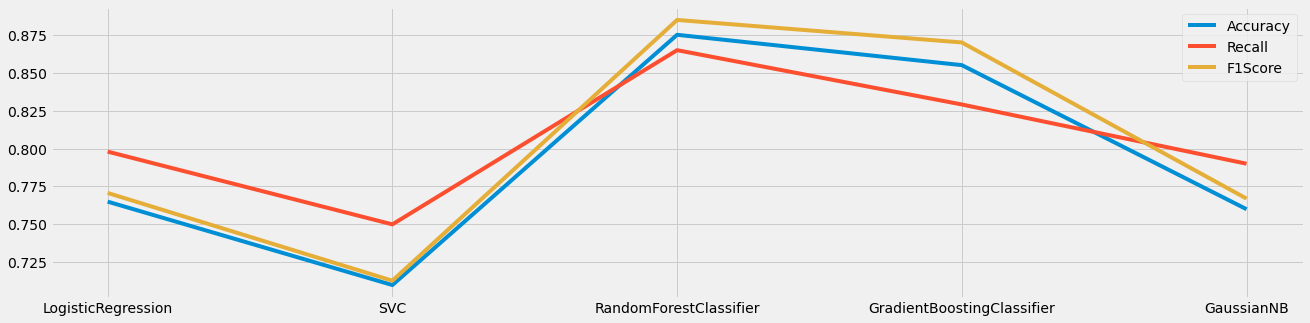

In [28]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result1,label='Accuracy')
plt.plot(FinalResult.Algorithm,result2,label='Recall')
plt.plot(FinalResult.Algorithm,result3,label='F1Score')

plt.legend()
plt.show()